## 1/ Create graph using edgelist from edge_list.txt file

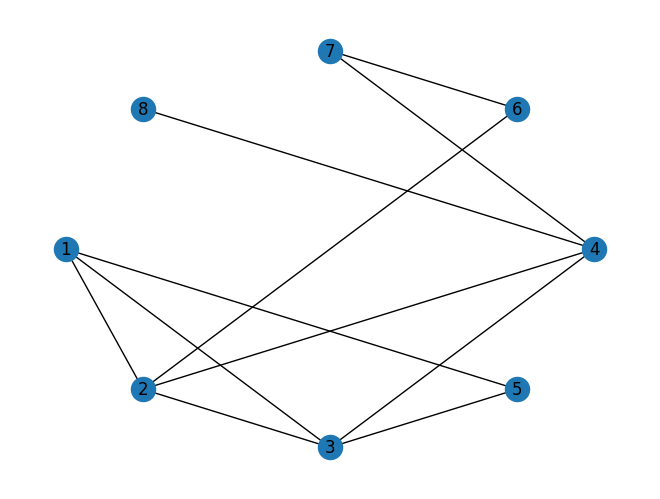

In [2]:
import networkx as nx
#  Undirected graph
G = nx.read_edgelist('./data/edge_list.txt')
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)
#nx.draw(G, pos=nx.spiral_layout(G),with_labels = True)
# Directed graph
# G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())

### 1.1/ Check edges


In [3]:
G.edges()

EdgeView([('1', '2'), ('1', '3'), ('1', '5'), ('2', '3'), ('2', '4'), ('2', '6'), ('3', '4'), ('3', '5'), ('4', '7'), ('4', '8'), ('6', '7')])

## 2/ Degree Centrality

In [4]:
#Check the degree of node 3
G.degree('3')

4

### 2.1/ Degree centrality: variance and Freeman

variance: 1.1875
Freeman: 0.23809523809523808


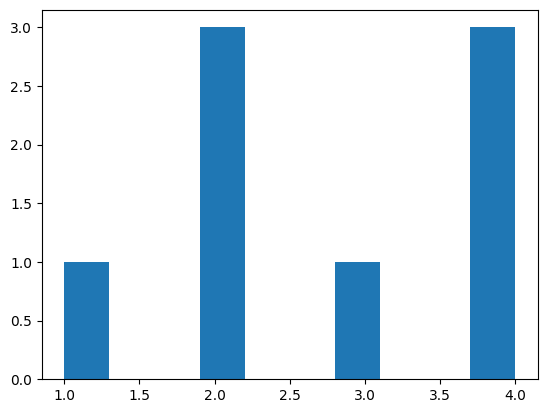

In [6]:
import matplotlib.pyplot as plt
#Degree plot for undirected and weighted graph
degrees = [G.degree(n) for n in G.nodes()]

#degrees = [G.degree(n, weight='weight') for n in G.nodes()]
plt.hist(degrees)
mean = sum(degrees) / len(degrees)

v_start = max(degrees)
n = len(degrees)
var = sum((i - mean) ** 2 for i in degrees) / n
freeman = sum((v_start - i) for i in degrees) / ((n-1)*(n-2))
print(f'variance: {var}')
print(f'Freeman: {freeman}')

### 2.2/ Histogram degree plot


(array([1., 0., 0., 2., 0., 0., 0., 0., 0., 2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

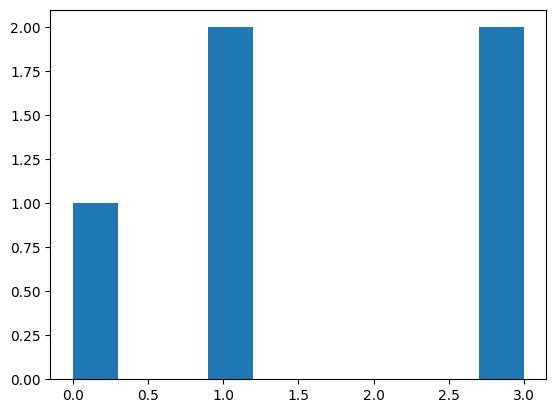

In [7]:
degrees = nx.degree_histogram(G)
plt.hist(degrees)


### 2.3/ Degree sequence 

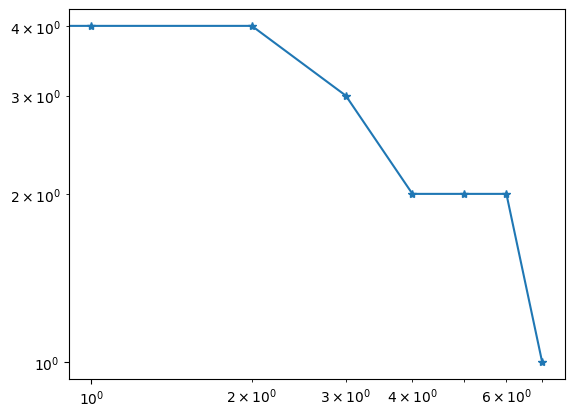

In [8]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.loglog(degree_sequence,marker='*')
plt.show()

### 2.4/ Degree centrality for unweighted graph


In [9]:
degree_centrality = nx.degree_centrality(G)

### 2.5/ Sort for identifying most inflential nodes using degree centrality


In [10]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

2 0.5714285714285714
3 0.5714285714285714
4 0.5714285714285714
1 0.42857142857142855
5 0.2857142857142857
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


### 2.6/ Calculating degree centrality manually

In [11]:
n_nodes = len(G.nodes)
for node in G.nodes():
  print(node, G.degree(node)/(n_nodes-1))

1 0.42857142857142855
2 0.5714285714285714
3 0.5714285714285714
5 0.2857142857142857
4 0.5714285714285714
6 0.2857142857142857
7 0.2857142857142857
8 0.14285714285714285


## 3/ Closeness centrality

{0: 0.4, 1: 0.5714285714285714, 2: 0.6666666666666666, 3: 0.5714285714285714, 4: 0.4}


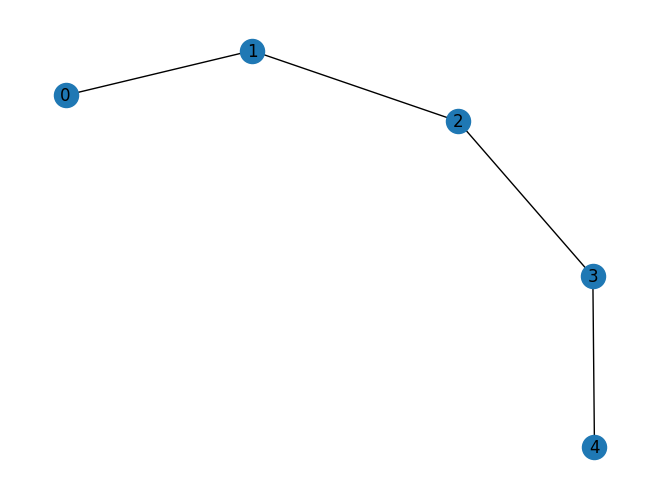

In [12]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (1, 2),
                   (2, 3),
                   (3, 4)])

nx.draw(G,with_labels = True)

closeness_centrality = nx.closeness_centrality(G)
print(closeness_centrality)
#Sort for identifying most inflential nodes using closeness_centrality
#for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
#  print(node, closeness_centrality[node])

## 4/ Betweenness centrality

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality

{0: 0.0, 1: 0.5, 2: 0.6666666666666666, 3: 0.5, 4: 0.0}

In [14]:
#Sort for identifying most inflential nodes using betweenness_centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
  print(node, betweenness_centrality[node])

2 0.6666666666666666
1 0.5
3 0.5
0 0.0
4 0.0


## 5/ Eigenvector centrality

If a node is pointed to by many nodes then that node will have high eigenvector centrality.

0 0.5163311132778224
3 0.46055890971297436
1 0.4078111673710816
5 0.3684701926326299
4 0.34608812874643013
2 0.18721071680314055
8 0.15382393197189428
6 0.14786314470285283
7 0.12548504820698178
9 0.05577442762250839


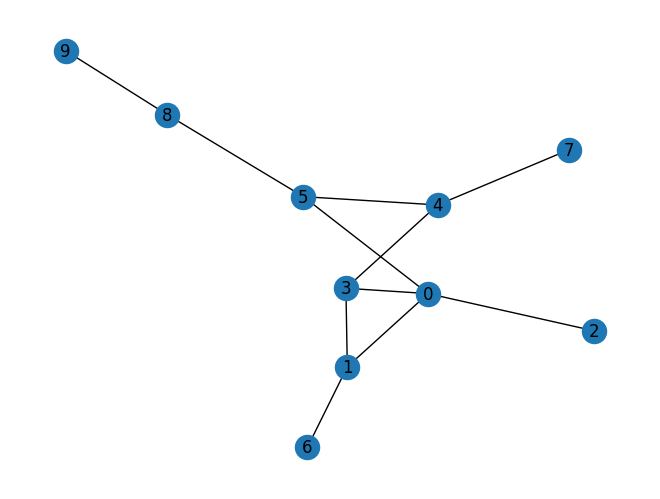

In [15]:
# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
nx.draw(G, with_labels = True)
#Caculate eigenvector_centrality

eigenvector_centrality = nx.eigenvector_centrality(G)
#Sort for identifying most inflential nodes using eigenvector centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality[node])

## 6/ Katz centrality

0 0.37205103620809643
3 0.34629455700255557
5 0.34249813319232264
1 0.34062920172505406
4 0.3376440691475183
8 0.30266484670465676
2 0.27846726557023055
6 0.27532508758241336
7 0.27502657686346177
9 0.2715286637721805


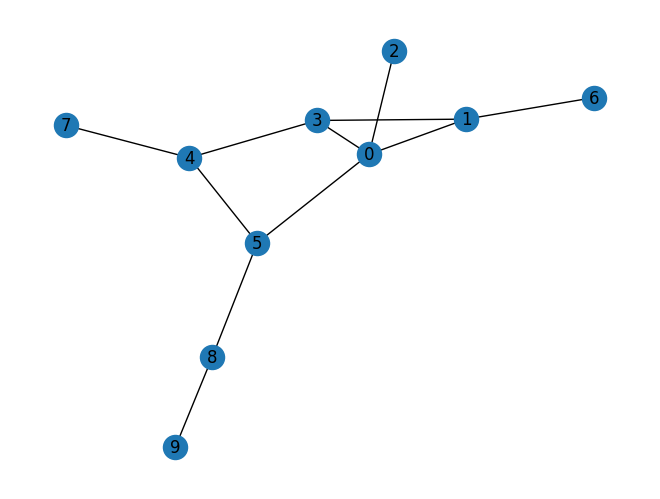

In [16]:
# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
nx.draw(G, with_labels = True)
#Caculate kat_centrality

kat_centrality = nx.katz_centrality(G)

#Sort for identifying most inflential nodes using kat_centrality
for node in sorted(kat_centrality, key=kat_centrality.get, reverse=True):
  print(node, kat_centrality[node])


## 7/ PageRank centrality

In [17]:
# Create a graph
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])
#Caculate pagerank

nx.pagerank(G,alpha=0.1)

{0: 0.10949439969135805,
 1: 0.10541496772119344,
 2: 0.09273734992283952,
 3: 0.09978650527263376,
 5: 0.10141741370884774,
 6: 0.09351382767489713,
 4: 0.10606037911522635,
 7: 0.09353532767489713,
 8: 0.1028950931069959,
 9: 0.09514473611111113}

Node Degree
   0     16
   1      9
   2     10
   3      6
   4      3
   5      4
   6      4
   7      4
   8      5
   9      2
  10      3
  11      1
  12      2
  13      5
  14      2
  15      2
  16      2
  17      2
  18      2
  19      3
  20      2
  21      2
  22      2
  23      5
  24      3
  25      3
  26      2
  27      4
  28      3
  29      4
  30      4
  31      6
  32     12
  33     17


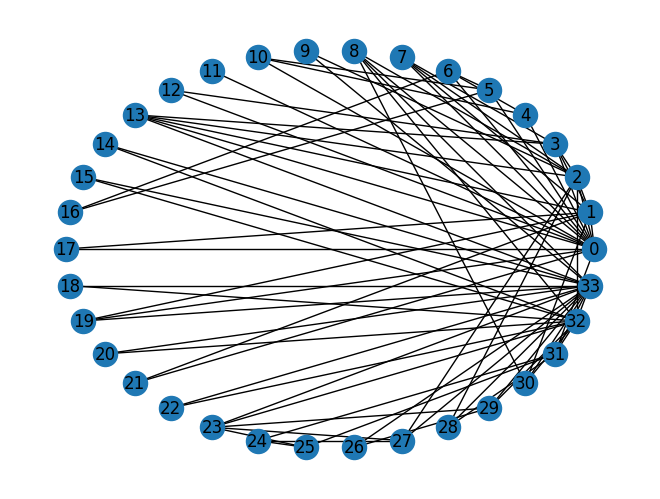

In [18]:
# import matplotlib.pyplot as plt
# import networkx as nx

G = nx.karate_club_graph()
print("Node Degree")
for v in G:
    print(f"{v:4} {G.degree(v):6}")

nx.draw_circular(G, with_labels=True)
plt.show()